In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [99]:
df=pd.read_csv('property.csv')
semilla=1992

In [100]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [101]:
new_df=df[['lat','lon','rooms','bathrooms','surface_total','surface_covered','price']]

In [102]:
new_df.head()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price
0,-34.605880,-58.384949,7.0,2.0,140.0,140.0,153000.0
1,-34.624056,-58.412110,2.0,2.0,70.0,58.0,159000.0
2,-34.593569,-58.427474,2.0,1.0,45.0,45.0,125000.0
3,-34.581294,-58.436754,2.0,1.0,85.0,50.0,295000.0
4,-34.914194,-57.938219,2.0,1.0,50.0,35.0,40000.0


In [103]:
new_df.corr()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.975578,-0.010933,0.019923,-0.019598,-0.004156,0.013393
lon,-0.975578,1.000000,-0.006931,-0.028612,-0.049097,-0.014388,0.009368
rooms,-0.010933,-0.006931,1.000000,0.613308,0.081044,0.075012,0.351025
bathrooms,0.019923,-0.028612,0.613308,1.000000,0.061159,0.069361,0.556861
surface_total,-0.019598,-0.049097,0.081044,0.061159,1.000000,0.430887,0.038727
surface_covered,-0.004156,-0.014388,0.075012,0.069361,0.430887,1.000000,0.049136
price,0.013393,0.009368,0.351025,0.556861,0.038727,0.049136,1.000000


<Axes: xlabel='lon', ylabel='price'>

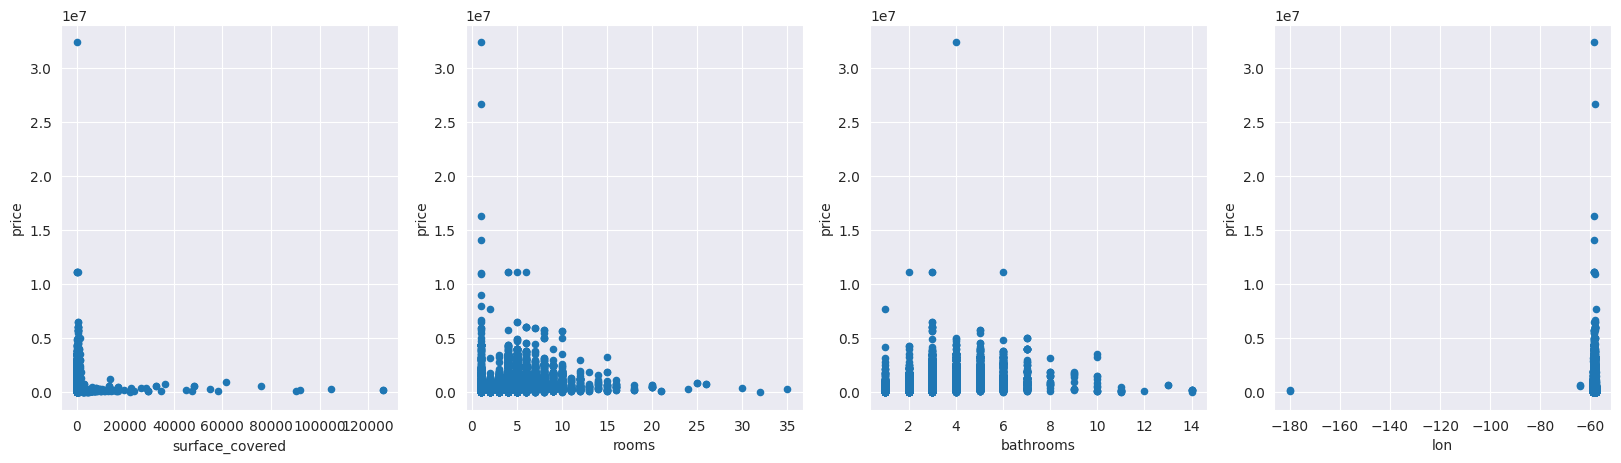

In [115]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,5))
df.plot.scatter(x='surface_covered',y='price', ax=ax1)
df.plot.scatter(x='rooms',y='price', ax=ax2)
df.plot.scatter(x='bathrooms',y='price', ax=ax3)
df.plot.scatter(x='lon',y='price', ax=ax4)


In [116]:
x=df[['lat','lon','rooms','bathrooms','surface_total','surface_covered','property_type']]
y=df['price']

In [117]:
x.head()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,property_type
0,-34.605880,-58.384949,7.0,2.0,140.0,140.0,Departamento
1,-34.624056,-58.412110,2.0,2.0,70.0,58.0,PH
2,-34.593569,-58.427474,2.0,1.0,45.0,45.0,PH
3,-34.581294,-58.436754,2.0,1.0,85.0,50.0,PH
4,-34.914194,-57.938219,2.0,1.0,50.0,35.0,PH


In [118]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=semilla)

In [119]:
print(f'el dataset de entrenamiento cuenta con {len(x_train)} observaciones')
print(f'el dataset de evaluacion cuenta con o {len(x_test)} observaciones')

el dataset de entrenamiento cuenta con 117328 observaciones
el dataset de evaluacion cuenta con o 29332 observaciones


In [126]:
# Verifica si hay valores NaN en las columnas especificadas
variables_exogenas=['surface_covered','bathrooms']

In [127]:
x_train_model_sup_bat = x_train[variables_exogenas].fillna(x_train[variables_exogenas].mean())
x_train_model_sup_bat.head()

,surface_covered,bathrooms
70245,129.000000,4.0
77713,120.000000,2.0
71663,113.000000,3.0
116592,111.253506,1.0
138776,66.000000,2.0


In [128]:
from sklearn.linear_model import LinearRegression

modelo_lineal_sup_bat=LinearRegression(fit_intercept=True)

In [129]:
modelo_lineal_sup_bat.fit(x_train_model_sup_bat,y_train)

LinearRegression()

In [133]:
coeficiente=modelo_lineal_sup_bat.coef_

In [132]:
intercepto=modelo_lineal_sup_bat.intercept_

In [134]:
beta_1,beta_2=coeficiente[0],coeficiente[1]

In [137]:
print(f'el intercepto es: {intercepto:.2f}')
print(f'el coeficiente para beta 1 es: {beta_1:.2f}')
print(f'el coeficiente para beta 2 es: {beta_2:.2f}')


el intercepto es: -49481.30
el coeficiente para beta 1 es: 5.69
el coeficiente para beta 2 es: 181187.86


In [ ]:
#el intercepto es el valor de la predicho de una propiedad sin superficie ni baño
#beta 1 es el valor esperado predicho a una propiedad aumentada en 5.69 por 1 metro cuadrado de la superficie total dada la cantidad de baños 
#el valor esperado de beta2 es de 181187.86 FRENTE A UN AUMENTO DE UN BAño dada la superficie total

In [138]:
def obtener_coeficientes(modelo,lista_variables):
    lista_variables=['intercepto']+lista_variables
    #intercepto
    intercepto=modelo.intercept_
    coeficiente=list(modelo.coef_)
    lista_coeficiente=[intercepto]+coeficiente
    return pd.DataFrame({'variable': lista_variables, 'coeficientes': lista_coeficiente})

In [139]:
coeficiente_modelo=obtener_coeficientes(modelo_lineal_sup_bat,variables_exogenas)
coeficiente_modelo

,variable,coeficientes
0,intercepto,-49481.298750
1,surface_covered,5.693132
2,bathrooms,181187.858230


In [151]:
#superficie cuartos

variables_exogenas2=['surface_total','rooms']
#creamos la matriz de x
x_model_sup_room=x_train[variables_exogenas2].fillna(x_train[variables_exogenas2].mean())

In [152]:
x_model_sup_room.head()

,surface_total,rooms
70245,138.000000,4.0
77713,240.000000,4.0
71663,126.000000,4.0
116592,217.050929,4.0
138776,70.000000,3.0


In [153]:
#Definimos la intancia de un modelo de regresion lineal
model_sup_room_fit=LinearRegression(fit_intercept=True)

In [155]:
#Realizamos proceso de esrimacion
model_sup_room_fit.fit(x_model_sup_room,y_train)

LinearRegression()

In [156]:
#Obtenemos los coeficientes de dataframe
coeficiente_modelo_room_sup=obtener_coeficientes(model_sup_room_fit,variables_exogenas2)
coeficiente_modelo_room_sup

,variable,coeficientes
0,intercepto,-1884.841589
1,surface_total,1.414921
2,rooms,78710.073697


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
